Matplotlib is building the font cache; this may take a moment.

<Figure size 1200x400 with 3 Axes>

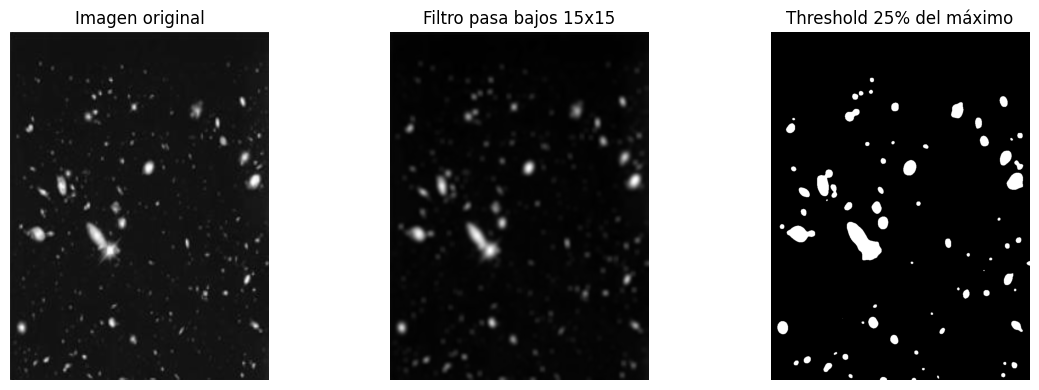

In [1]:
# === Filtro pasa bajos 15x15 + Threshold 25% ===
# Compatible con JupyterLite (usa solo numpy, PIL, matplotlib)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# --- Cargar imagen ---
# Asegurate de haber subido tu imagen y usar el nombre correcto
img_path = "stars.png"  # <-- cambialo por el nombre del archivo
img = Image.open(img_path).convert("L")  # convertir a escala de grises
img_array = np.array(img, dtype=np.float32)

# --- Crear kernel 15x15 de promedio ---
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)

# --- Aplicar convolución manual ---
def convolve2d(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

lowpass_img = convolve2d(img_array, kernel)

# --- Aplicar threshold al 25% del máximo ---
threshold_value = 0.25 * np.max(lowpass_img)
threshold_img = (lowpass_img >= threshold_value).astype(np.uint8) * 255

# --- Mostrar resultados ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap="gray")
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(lowpass_img, cmap="gray")
plt.title("Filtro pasa bajos 15x15")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(threshold_img, cmap="gray")
plt.title("Threshold 25% del máximo")
plt.axis("off")

plt.tight_layout()
plt.show()

In [2]:
"""
El codigo aplica a la imagen original un filtro pasabajos de 15x15 suavisando la imagen y 
eliminando las estrellas mas chicas y menos brillantes.
Es decir, las estrellas pequeñas o aisladas se difuminan o desaparecen, mientras que las 
más brillantes se mantienen visibles pero con bordes menos definidos.

Luego se aplica un Threshold de 25% que fija un valor de corte (threshold) del 25 % del 
brillo máximo. Los píxeles mayores a 0.25 se marcan como blancos (True), y los menores 
como negros (False). Esto genera una imagen binaria (blanco y negro).

Solo las estrellas más brillantes permanecen visibles (blancas).
Las zonas más oscuras o difusas se vuelven completamente negras.
El resultado resalta las estrellas principales y elimina el fondo.

Concluyendo:
El filtro pasa bajos suaviza la imagen y reduce detalles de alta 
frecuencia.
El umbral permite destacar solo las regiones más brillantes.
Combinados, ambos pasos son útiles para detectar objetos luminosos 
grandes (como estrellas más brillantes) y eliminar ruido o puntos 
débiles del fondo.
"""